In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns

In [2]:
jeans=glob.glob('jeans/*.jpg')
sofa=glob.glob('sofa/*.jpg')
tshirt=glob.glob('tshirt/*.jpg')
tv=glob.glob('tv/*.jpg')

In [3]:
print(len(jeans))
print(len(sofa))
print(len(tshirt))
print(len(tv))

199
199
199
199


In [4]:
jeans[0]

'jeans\\1.jpg'

In [5]:
plt.imread(jeans[0])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

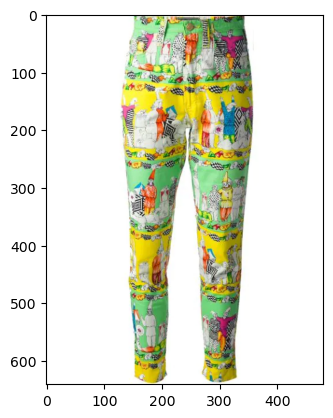

In [6]:
plt.imshow(plt.imread(jeans[0]))

In [7]:
images=[]
labels=[]

for i in jeans:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

for i in tv:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

for i in tshirt:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in sofa:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)

In [8]:
label_names={1:'Jeans',2:'TV',3:'T-Shirt',4:'Sofa'}

In [9]:
images,labels=shuffle(images,labels)

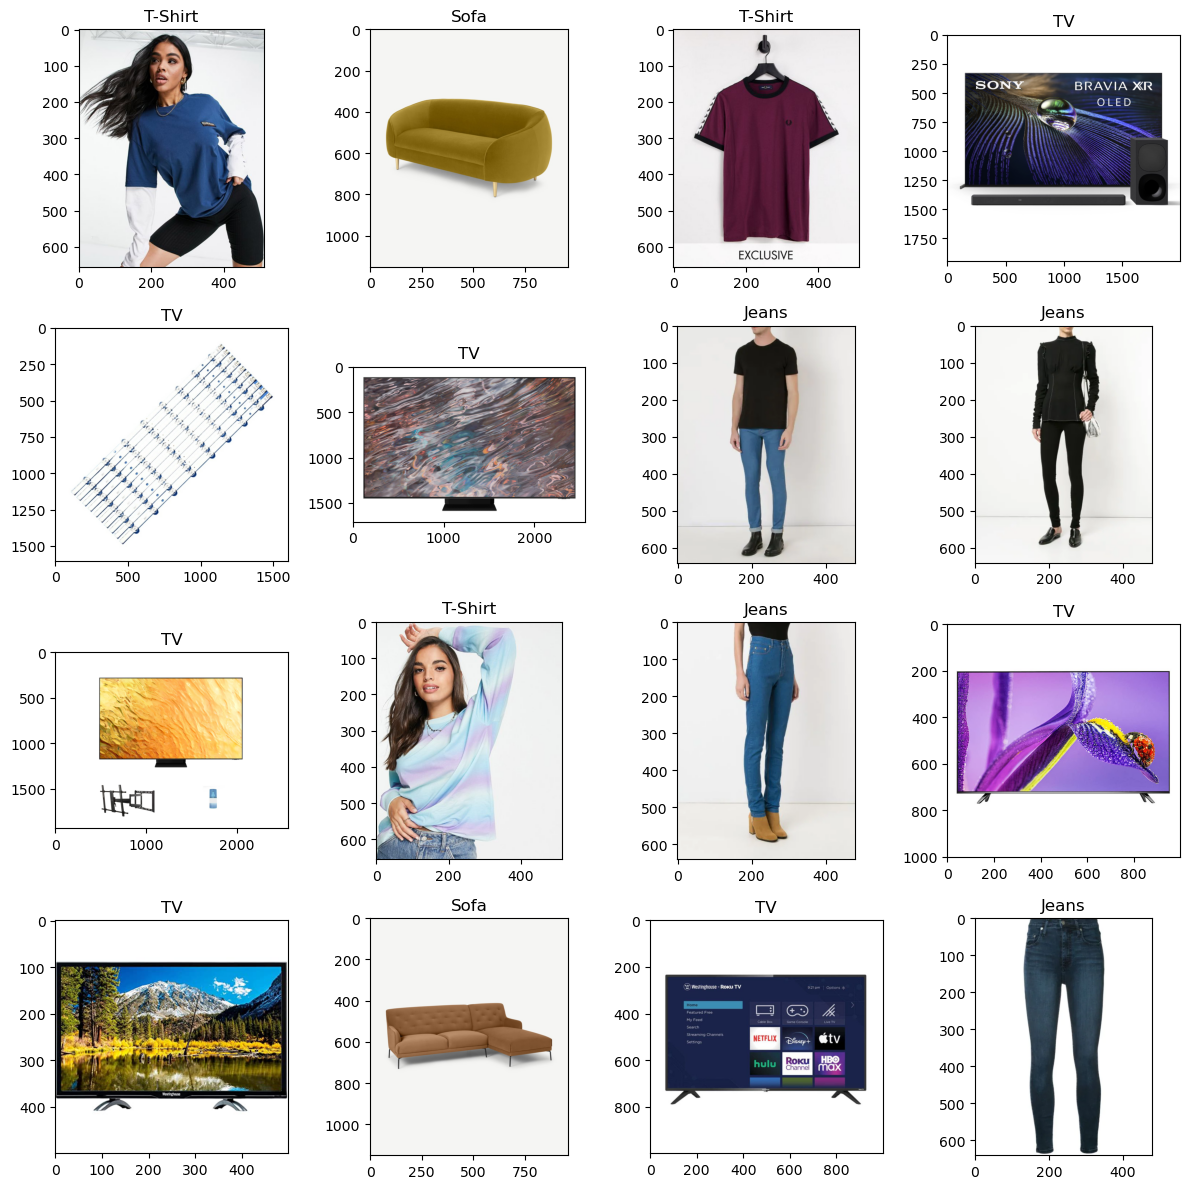

In [10]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

In [11]:
x=[]

for i in images:
    x.append(resize(i,(300,300,3)))

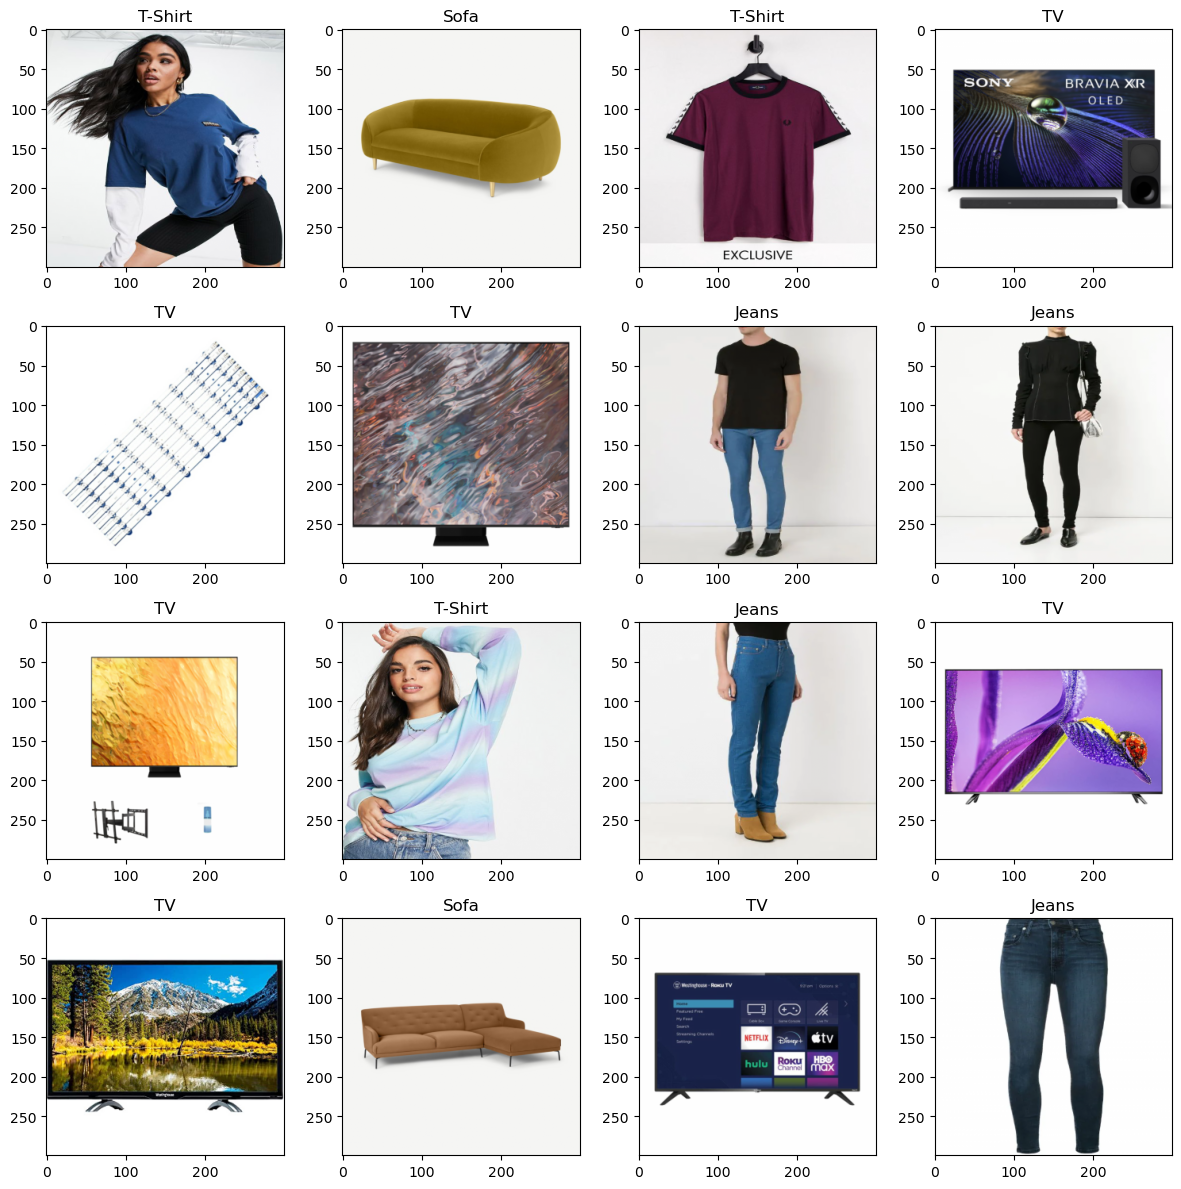

In [12]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(label_names[labels[i]])
plt.tight_layout()

In [14]:
x=np.array(x)
y=np.array(labels)

In [15]:
x.shape

(796, 300, 300, 3)

In [16]:
d1,d2,d3,d4=x.shape

In [17]:
d1

796

In [18]:
x=x.reshape(d1,d2*d3*d4)

In [19]:
x[0]

array([0.86666667, 0.8745098 , 0.87058824, ..., 0.93031292, 0.9240556 ,
       0.93305914])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
model=SVC()

In [23]:
%time model.fit(x_train,y_train)

Wall time: 2min 20s


SVC()

In [24]:
predicted=model.predict(x_test)

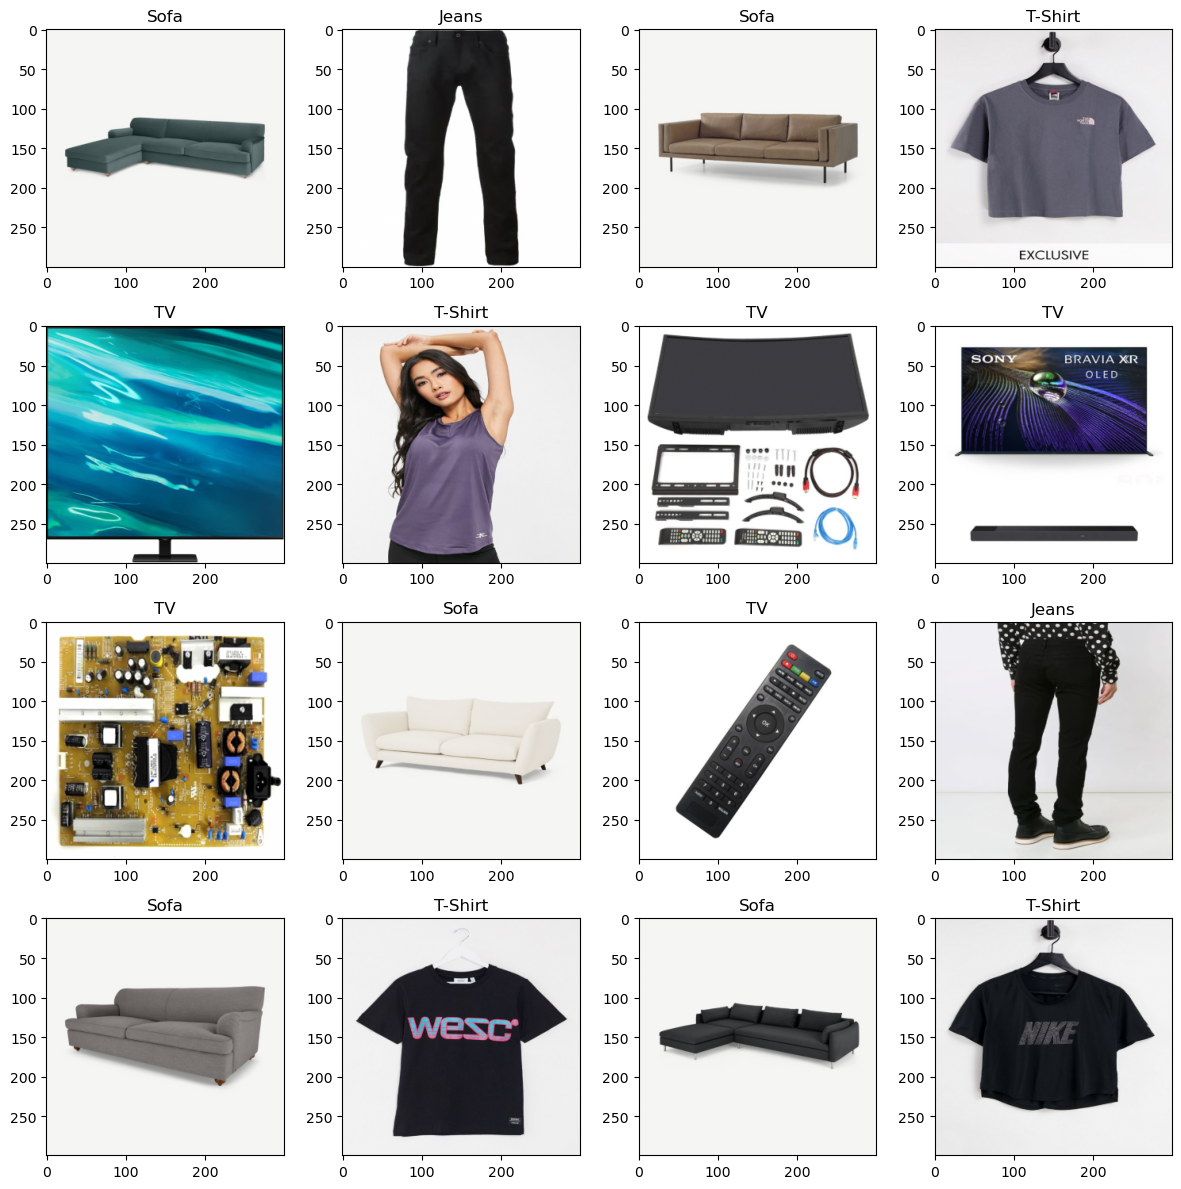

In [25]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(300,300,3))
    plt.title(label_names[predicted[i]])
plt.tight_layout()

In [27]:
accuracy_score(y_test,predicted)

0.9625

In [28]:
confusion_matrix(y_test,predicted)

array([[45,  2,  0,  0],
       [ 1, 38,  2,  1],
       [ 0,  0, 34,  0],
       [ 0,  0,  0, 37]], dtype=int64)

<AxesSubplot:>

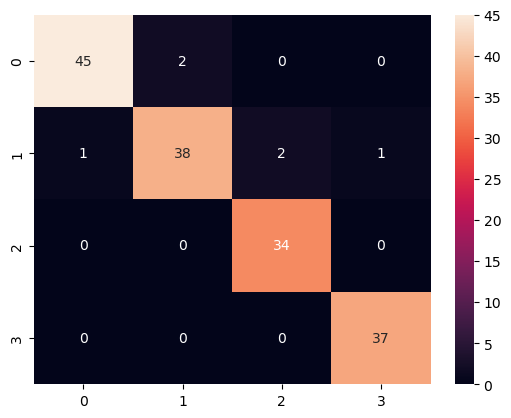

In [31]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)

In [32]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97        47
           2       0.95      0.90      0.93        42
           3       0.94      1.00      0.97        34
           4       0.97      1.00      0.99        37

    accuracy                           0.96       160
   macro avg       0.96      0.97      0.96       160
weighted avg       0.96      0.96      0.96       160

